In [257]:
import random as rd
import numpy as np
import scipy as sp
from math import log, exp

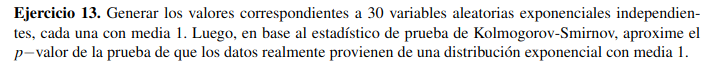

Calculo el estadistico de K_S, con mi H0 siendo que los datos provienen de una distribucion continua Exponencial con media 1. Y el D es:
$$
D = \max_{1 \leq j \leq n} \left\{ \frac{j}{n} - F(Y_{(j)}), F(Y_{(j)}) - \frac{j-1}{n} \right\}
$$

In [259]:
def estadistico_K_S_expon(data):
    data.sort()
    n = len(data)
    D = 0
    for i in range(n):
        F_yj = sp.stats.expon.cdf(data[i])
        izq = ((i+1)/n) - F_yj
        der = F_yj - i/n
        D = max(D, izq, der)
    return D

def estadistico_K_S_uniform(data):
    data=np.sort(data) #Ordeno
    n=len(data)
    d=0
    for j in range(n):
        x=data[j]
        d=max(d ,((j+1)/n)-x , x - j/n)
    return d

Ahora para aproximar el p-valor, realizo k simulaciones de muestras de tamaño n(30), utilizando que el D sera:
$$
D = \max_{1 \leq j \leq n} \left\{ \frac{j}{n} - U_{(j)}, U_{(j)} - \frac{j-1}{n} \right\}
$$

In [260]:
def estimar_pvalor(nsims, muestra):
    n = len(muestra)
    # calculo el estadistico con un H0 que supone que vienen de una exp(1)
    d = estadistico_K_S_expon(muestra)
    print("Estadistico de la muestra: ", d)
    hits = 0
    for _ in range(nsims):
        muestra_sim = [rd.uniform(0,1) for _ in range(n)]
        d_sim = estadistico_K_S_uniform(muestra_sim)
        if d_sim >= d:
            hits += 1
    return hits/nsims

In [268]:
muestra = sp.stats.expon.rvs(size=30, scale=1)

In [292]:
nsims = 10000
pvalor = estimar_pvalor(nsims, muestra)
print("P-valor: ", pvalor)

Estadistico de la muestra:  0.10963392166796693
P-valor:  0.8222


In [293]:
sp.stats.kstest(muestra, sp.stats.expon.cdf, args=(0, 1))

KstestResult(statistic=0.10963392166796693, pvalue=0.8256165637872438, statistic_location=0.8587310099147453, statistic_sign=-1)